# Convert `nsc_qa` to `iapp_wiki_qa_squad` format

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
from datasets import load_dataset, load_from_disk

In [15]:
#convert to jsonl format
with open('../data/thwikiqa-15k_passage-w300.squad-format.json') as f:
    j = json.load(f)

with open('../data/thwikiqa-15k_passage-w300.squad-format.jsonl', 'a') as f:
    for i in j:
        json.dump(i,f)
        f.write('\n')
        
with open('../data/thwikiqa-4k_passage-w300.squad-format.json') as f:
    j = json.load(f)

with open('../data/thwikiqa-4k_passage-w300.squad-format.jsonl', 'a') as f:
    for i in j: 
        json.dump(i,f)
        f.write('\n')

In [17]:
datasets = load_dataset('json', 
                       data_files={'train':'../data/thwikiqa-15k_passage-w300.squad-format.jsonl',
                                   'valid':'../data/thwikiqa-4k_passage-w300.squad-format.jsonl',
                                  },)
datasets

W0711 22:30:58.632951 139988656719680 builder.py:357] Using custom data configuration default-91e5c645f89bfbf6
W0711 22:30:58.679889 139988656719680 builder.py:512] Reusing dataset json (/home/cstorm125/.cache/huggingface/datasets/json/default-91e5c645f89bfbf6/0.0.0/dc7ee63ec8b554c48ecc5a8a6fbe27af8071408c244e4347cf9222d6206d83a2)


DatasetDict({
    train: Dataset({
        features: ['dataset', 'question', 'question_id', 'doc_id', 'answers', 'passage', 'passage_ntokens_newmm', 'passage_ntokens_wn_att', 'passage_ntokens_wn_thwiki', 'title'],
        num_rows: 15010
    })
    valid: Dataset({
        features: ['dataset', 'question', 'question_id', 'doc_id', 'answers', 'passage', 'passage_ntokens_newmm', 'passage_ntokens_wn_att', 'passage_ntokens_wn_thwiki', 'title'],
        num_rows: 4010
    })
})

In [19]:
datasets['train'][0]

{'dataset': 'thwiki_qa15k_newmm-300',
 'question': 'เวียนนามถูกจีนปกครองนานนับพันปี ตั้งแต่ พ.ศ. 432 จนถึงปี พ.ศ. ใด',
 'question_id': 14947,
 'doc_id': 69950,
 'answers': {'answer_start': [527], 'answer_end': [531], 'text': ['1481']},
 'passage': 'จื๋อโนม จื๋อโนม () เป็นระบบอักษรที่ใช้เขียนภาษาเวียดนาม ปัจจุบันเลิกใช้แล้ว จื๋อโนมประกอบด้วยอักษรจีน ("ฮั่นจื้อ" เรียกเป็นภาษาเวียดนามว่า "ฮ้านตึ" - ) และอักขระที่ประดิษฐ์ขึ้นตามแบบอักษรจีน ตัวอย่างที่เก่าที่สุดอยู่ในช่วงคริสต์ศตวรรษที่ 13 มักนิยมใช้เฉพาะในหมู่ชนชั้นสูงของเวียดนาม โดยส่วนใหญ่ใช้บันทึกวรรณคดีเวียดนาม (งานเขียนที่เป็นทางการส่วนใหญ่จะใช้ภาษาจีนแบบแผน ไม่ใช่ภาษาเวียดนาม) ปัจจุบันถือว่าถูกแทนที่โดยสมบูรณ์ด้วยจื๋อโกว๊กหงือซึ่งดัดแปลงจากอักษรละตินประวัติ ประวัติ. เวียดนามถูกจีนปกครองนานนับพันปีระหว่าง พ.ศ. 432–1481 เป็นผลให้ภาษาเขียนในทางราชการเป็นภาษาจีนโบราณที่รู้จักในชื่อ "จื๋อญอ" () ในภาษาเวียดนาม จื๋อญอยังใช้ต่อมาในเวียดนามร่วมกับจื๋อโนมและจนถึง พ.ศ. 2461 ในช่วงประมาณ พ.ศ. 1500 ชาวเวียดนามปรับปรุงอักษรจีนใช้เขียนภาษาของตน เรี

In [20]:
def convert_nscqa_to_iapp(example):
    example['context'] = example['passage']
    example['article_id'] = str(example['doc_id'])
    return example

In [21]:
datasets = datasets.map(convert_nscqa_to_iapp, remove_columns=['dataset',
                                                               'doc_id',
                                                               'passage',
                                                               'passage_ntokens_newmm',
                                                               'passage_ntokens_wn_att',
                                                               'passage_ntokens_wn_thwiki'])

In [24]:
i = 301
example = datasets['train'][i]
example

{'answers': {'answer_end': [470],
  'answer_start': [461],
  'text': ['ค.ศ. 2002']},
 'article_id': '284937',
 'context': 'ลอตเต้เวิลด์ ลอตเต้เวิลด์ (; ) เป็นสวนสนุกแห่งหนึ่งตั้งอยู่ในโซล ประเทศเกาหลีใต้ พื้นที่ประกอบด้วยสวนสนุกในร่มและกลางแจ้ง และมีสิ่งอำนวยความสะดวกอื่นๆในบริเวณสวนสนุก อาทิ การเชื่อมต่อกับระบบรถไฟฟ้ารางเดี่ยว ห้างสรรพสินค้า โรงแรม และพิพิธภัณฑ์พื้นบ้านของเกาหลี รวมทั้งโรงภาพยนตร์ พิพิธภัณฑ์สัตว์น้ำ และพื้นที่สำหรับการกีฬา สวนสนุกในร่มของลอตเต้เวิลด์เป็นสวนสนุกในร่มที่มีขนาดใหญ่ติดอันดับโลก และเคยได้รับการจัดอันดับที่ 7 ของสถานที่ท่องเที่ยวน่าดึงดูดของโลกในปี ค.ศ. 2002 สวนสนุกแห่งนี้เปิดบริการตั้งแต่วันที่ 12 กรกฎาคม ค.ศ. 1989 มีจำนวนนักท่องเที่ยวกว่า 8 ล้านคนต่อปี',
 'question': 'สวนสนุกลอตเต้เวิลด์ในประเทศเกาหลีใต้เคยได้รับการจัดอันดับที่ 7 ของสถานที่ท่องเที่ยวน่าดึงดูดของโลกในปีไหน',
 'question_id': 6859,
 'title': 'ลอตเต้เวิลด์'}

In [25]:
example['context'][example['answers']['answer_start'][0]:example['answers']['answer_end'][0]], example['answers']['text']

('ค.ศ. 2002', ['ค.ศ. 2002'])

In [26]:
datasets.save_to_disk("nsc_qa_w300")

In [27]:
x = load_from_disk('nsc_qa_w300')
x

DatasetDict({
    train: Dataset({
        features: ['answers', 'article_id', 'context', 'question', 'question_id', 'title'],
        num_rows: 15010
    })
    valid: Dataset({
        features: ['answers', 'article_id', 'context', 'question', 'question_id', 'title'],
        num_rows: 4010
    })
})

In [28]:
datasets = datasets.map(lambda x: {'context_len':len(x['context'])})

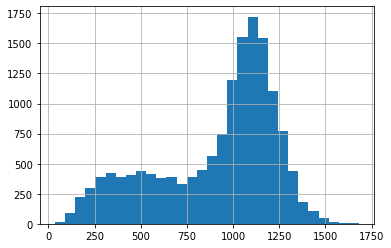

In [29]:
train_df = pd.DataFrame(datasets['train'])
train_df.context_len.hist(bins=30)

In [33]:
train_df.sort_values('context_len',ascending=False)

,answers,article_id,context,context_len,question,question_id,title
5320,"{'answer_end': [125], 'answer_start': [107], '...",346369,โรงเรียนเตรียมอุดมศึกษาน้อมเกล้า นครราชสีมา โร...,1683,ชื่อแรกเริ่มของโรงเรียนเตรียมอุดมศึกษาน้อมเกล้...,11804,โรงเรียนเตรียมอุดมศึกษาน้อมเกล้า นครราชสีมา
3044,"{'answer_end': [814], 'answer_start': [804], '...",346369,โรงเรียนเตรียมอุดมศึกษาน้อมเกล้า นครราชสีมา โร...,1683,โรงเรียนเตรียมอุดมศึกษา ภาคตะวันออกเฉียงเหนือ ...,11807,โรงเรียนเตรียมอุดมศึกษาน้อมเกล้า นครราชสีมา
7791,"{'answer_end': [571], 'answer_start': [550], '...",181487,ครุยวิทยฐานะไทย ครุยวิทยฐานะไทย เป็นชุดพิธีการ...,1647,มหาวิทยาลัยใดที่ได้รับพระราชทานพระบรมราชานุญาต...,13688,ครุยวิทยฐานะไทย
2483,"{'answer_end': [71], 'answer_start': [61], 'te...",176649,คณะนิติศาสตร์ มหาวิทยาลัยธรรมศาสตร์ คณะนิติศาส...,1615,คณะนิติศาสตร์ที่เก่าแก่ที่สุดในประเทศไทยอยู่ที...,4622,คณะนิติศาสตร์ มหาวิทยาลัยธรรมศาสตร์
8971,"{'answer_end': [1576], 'answer_start': [1575],...",51190,ชนนีนราธิวาส วิทยาลัยการอาชีพตากใบ เป็นองค์กรเ...,1603,การเรียนการสอนของมหาวิทยาลัยนครพนมมทั้งมดกี่คณะ,5964,มหาวิทยาลัยนครพนม
...,...,...,...,...,...,...,...
2032,"{'answer_end': [53], 'answer_start': [44], 'te...",841202,แห่งแรกในประเทศจีน ที่พระจักรพรรดิถวายนามว่าวั...,71,วัดภิกษุณีแห่งแรกในประเทศจีนคือวัดใด,5011,วัดอภัยคีรีวิหาร
14291,"{'answer_end': [31], 'answer_start': [30], 'te...",736934,ดา พรหมจรรย์ มีบุตรชายด้วยกัน 2 คนคือ น้องแต๊ง...,64,ต๋อง ชวนชื่น นักแสดงตลกชาวไทยจากคณะชวนชื่น มีบ...,4151,ต๋อง ชวนชื่น
10316,"{'answer_end': [30], 'answer_start': [20], 'te...",577168,จูรง จูรง () เป็นเขตอุตสาหกรรมแห่งหนึ่งในประเท...,55,จูรงเป็นเขตเกี่ยวกับอะไรในประเทศสิงคโปร์,13302,จูรง
2360,"{'answer_end': [22], 'answer_start': [14], 'te...",831669,ประจำโรงเรียน ต้นพะยอมทำเนียบผู้บริหารข้อมูลอาคาร,49,ต้นไม้ชนิดใดเป็นต้นไม้ประจำโรงเรียนวัดใหม่เนิน...,10924,โรงเรียนวัดใหม่เนินพยอม


In [34]:
train_df.context[5320]

'โรงเรียนเตรียมอุดมศึกษาน้อมเกล้า นครราชสีมา โรงเรียนเตรียมอุดมศึกษาน้อมเกล้า นครราชสีมา แต่เดิมชื่อโรงเรียนนครราชสีมาวิทยาลัยก่อตั้งเมื่อปีพ.ศ. 2538โดยอยู่ภายใต้สังกัดกรมสามัญศึกษา เป็นโรงเรียนที่สร้างขึ้นโดยมีจุดประสงค์เพื่อเป็นศูนย์กลางทางการศึกษาของจังหวัดนครราชสีมาและเพื่อรองรับการสร้าง โรงเรียนเตรียมอุดมศึกษา ภาคตะวันออกเฉียงเหนือตามโครงการของกระทรวงศึกษาธิการเพื่อเปิดโอกาสให้นักเรียนในต่างจังหวัดมีคุณภาพทัดเทียมกับโรงเรียนที่มีชื่อเสียงในกรุงเทพมหานคร จึงประกาศจัดตั้งโรงเรียนเตรียมอุดมศึกษาขึ้นทั้ง 3 แห่งได้แก่ 1.โรงเรียนเตรียมอุดมศึกษา ภาคใต้(โรงเรียนศรีวิชัย อำเภอพระพรหม จังหวัดนครศรีธรรมราช) 2.โรงเรียนเตรียมอุดมศึกษา ภาคเหนือ(โรงเรียนพิษณุโลกศึกษา อำเภอเมืองพิษณุโลก จังหวัดพิษณุโลก) 3.โรงเรียนเตรียมอุดมศึกษา ภาคตะวันออกเฉียงเหนือ(โรงเรียนนครราชสีมาวิทยาลัย อำเภอเมืองนครราชสีมา จังหวัดนครราชสีมา) ในโครงการของกระทรวงศึกษาธิการนั้น ได้เกิดความล้มเหลวเนื่องจากงบที่จะใช้พัฒนาการศึกษาและพัฒนาโรงเรียน(ในช่วงก่อนจะมีโครงการนี้ขึ้น)ได้ไปเข้าโรงเรียนราชสีมาวิทยาลัย โรงเรียนสุรนารีวิทยา